<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>CNN(Convolution Neural Network)

**Convolution Layer**

Conv1D, Conv2D, Conv3D, SeparableConv1D, SeparableConv2D, DepthwiseConv2D, Conv2DTranspose, Conv3DTransopse

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
shape = (4, 28, 28, 3)
x = tf.random.normal(shape)
y = tf.keras.layers.Conv2D(2, 3, activation = 'relu', input_shape = shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [3]:
shape[1:]

(28, 28, 3)

**Pooling Layer**

MaxPooling1D, MaxPooling2D, AveragePooling1D, AveragePooling2D, GlobalMaxPooling1D, GlobalMaxPooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D

In [4]:
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x.shape)
x = tf.reshape(x, [1, 3, 3, 1])
print(x)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid')
print(max_pool_2d(x))

(3, 3)
tf.Tensor(
[[[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]

  [[7]
   [8]
   [9]]]], shape=(1, 3, 3, 1), dtype=int32)
tf.Tensor(
[[[[5]
   [6]]

  [[8]
   [9]]]], shape=(1, 2, 2, 1), dtype=int32)


In [5]:
(train_img, train_lab), (test_img, test_lab) = keras.datasets.mnist.load_data()
print(train_img.shape)
print(test_img.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [6]:
train_img = train_img.reshape((60000, 28, 28, 1))
test_img = test_img.reshape((10000, 28, 28, 1))

In [7]:
train_img[0].shape

(28, 28, 1)

In [8]:
train_img[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [9]:
train_img, test_img = train_img / 255, test_img / 255

In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = train_img[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_img, train_lab, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1473 - accuracy: 0.9545
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0199 - accuracy: 0.9938


**모델 저장 / 재사용**

In [13]:
model.save('./my_model.hdf5')

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model = load_model('./my_model.hdf5')

**ALL**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(x_tr, y_tr), (x_te, y_te) = keras.datasets.mnist.load_data()

In [23]:
x_tr = x_tr.reshape(x_tr.shape[0], 28, 28, 1).astype('float32') / 255
x_te = x_te.reshape(x_te.shape[0], 28, 28, 1).astype('float32') / 255
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

In [32]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [36]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [37]:
modelpath = './cnn_md.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                               save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

In [38]:
history = model.fit(x_tr, y_tr, validation_split = 0.25, epochs = 20, batch_size = 100, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 2.30185, saving model to ./cnn_md.hdf5

Epoch 2: val_loss did not improve from 2.30185

Epoch 3: val_loss did not improve from 2.30185

Epoch 4: val_loss did not improve from 2.30185

Epoch 5: val_loss did not improve from 2.30185

Epoch 6: val_loss did not improve from 2.30185


In [39]:
acc_score = model.evaluate(x_te, y_te)[1]
print('Test Accuracy: %.4f' %acc_score)

313/313 [==============================] - 7s 23ms/step - loss: 2.3319 - accuracy: 0.1135
Test Accuracy: 0.1135


In [40]:
model.evaluate(x_te, y_te)

313/313 [==============================] - 6s 21ms/step - loss: 2.3319 - accuracy: 0.1135


[2.331894636154175, 0.11349999904632568]

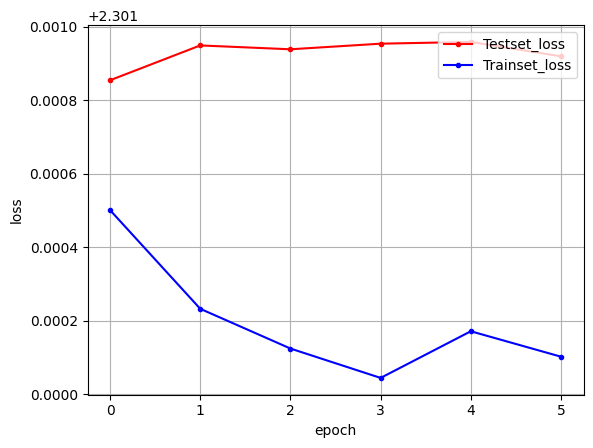

In [41]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()